
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 3 - Curso 2024
## Análisis de Fourier de tiempo corto
### Procesamiento tiempo-frecuencia


## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Es necesario abordar todos los ejercicios propuestos.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 14 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes.
 - Los ejercicios marcados como $\blacklozenge$ son opcionales.


**Nombre de el/la estudiante:** 

### Cómo correr este notebook

Es posible descargarlo y correrlo localmente en su computadora

Tambien pueden correrlo en Google Colab usando el siguiente link.

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/practicos/AudioDSP_Practico_3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
</table>

In [1]:
# Al correr esta celda, se podrá acceder a archivos
# y carpetas en su cuenta de google drive.
# Puede ver la estructura de carpetas apretando en
# el icono de carpeta de la barra lateral izquierda.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Directorio de archivos
dir_files = './Archivos_P3/'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal
import pandas as pd
from scipy.io.wavfile import read
from IPython.display import Audio

# Ejercicio 1

En este ejercicio se estudia la relación entre la transformada de Fourier de tiempo corto y la función de autocorrelación de tiempo corto. Si definimos la densidad espectral de potencia en tiempo corto de una señal ($x[n]$) en función de su transformada de Fourier en tiempo corto como

\begin{equation*}
	S_n(e^{jw}) = |X_n(e^{jw})|^2
\end{equation*}

y la función de autocorrelación de tiempo corto de la señal ($x[n]$) como

\begin{equation*}
	R_n[k] = \sum_{m=-\infty}^{\infty}w[n-m]x[m]w[n-k-m]x[m+k],
\end{equation*}

probar que si

\begin{equation*}
	X_n(e^{jw}) = \sum_{m=-\infty}^{\infty}x[m]w[n-m]e^{-jwm}
\end{equation*}

$R_n[k]$ y $S_n(e^{jw})$ son un par de transformadas, i.e. $S_n(e^{jw})$ es la transformada de Fourier de $R_n[k]$.


## Respuesta:

Hecho directo en el informe.


# Ejercicio 2

En este ejercicio se estudia un método de detección de frecuencia fundamental (o _pitch_) basado en la transformada de Fourier de tiempo corto. Se sugiere utilizar el archivo [_LP-mem-6-a.wav_](./Archivos_P3/LP-mem-6-a.wav) para probarlo.

## Parte 1
El producto armónico espectral -Harmonic Product Spectrum, HPS- (ver _Pitch Detection in the Spectral Domain, pág. 623_, en  L. R. Rabiner and R. W. Schafer, _Theory and Applications of Digital Speech Processing_. Prentice Hall, 1st ed., 2011 [1]) está dado por

\begin{equation*}
	P_n(e^{jw}) = \prod_{r=1}^{K}|X_n(e^{jwr})|^2
\end{equation*}

Tomando el logaritmo se obtiene (log-Harmonic Product Spectrum, log-HPS),

\begin{equation*}
	\hat{P}_n(e^{jw}) = 2\sum_{r=1}^{K}\log|X_n(e^{jwr})|
\end{equation*}

**_Responder:_**

Explique por qué el HPS puede usarse para detección de _pitch_. Asuma que la señal de audio es monofónica (una única fuente armónica). ¿Qué ventajas presenta el uso del log-HPS frente al HPS? ¿Qué ocurre con señales cuya frecuencia fundamental está ausente (e.g. filtrado pasa-altos por el canal de comunicación)?


_Respuesta:_

Hecho directo en el informe.

## Parte 2

El espectro logarítmico acumulado (ó GLogS por sus siglas en inglés), se calcula como el promedio de logaritmo de la magnitud del espectro en posiciones armónicas de una frecuencia fundamental $f_0$, como

\begin{equation*}
	\rho_n(f_0) = \frac{1}{n_H}\sum_{i=1}^{n_H}\log|X_n(if_0)|
\end{equation*}

siendo $n_H$ la cantidad de armónicos de $f_0$ cuya frecuencia es menor a cierta frecuencia máxima $f_{\max}$.

Implemente un algoritmo de detección de _pitch_ que calcule el GLogS para valores de $f_0$ distribuidos de forma logarítmica entre $55Hz$ ($A1$) y $1046.5Hz$ ($C6$) con un paso de cuarto de tono, y $f_{\max} =  5000Hz$.

In [4]:
# Implementación
sr, audio = io.wavfile.read(
    dir_files + "LP-mem-6-a.wav"
)
display(Audio(audio, rate=sr))

f_min = 55.0  
f_max = 1046.5  
quarter_tone = 2 ** (1 / 24)  

# Generación de frecuencias
frequencies = []
f = f_min
while f <= f_max:
    frequencies.append(f)
    f *= quarter_tone

frequencies = np.array(frequencies)
f_max = 5000

In [5]:
from scipy import interpolate

def GLogS(f_max, f0, Xn, fn):
    """Calcula el Espectro Logarítmico Generalizado (GLogS) para una frecuencia fundamental dada.
    
    Parámetros
    ----------
    f_max : float
        Frecuencia máxima a considerar para el cálculo de armónicos
    f0 : float 
        Frecuencia fundamental a analizar
    Xn : numpy array
        Valores del espectro de magnitud
    fn : numpy array
        Valores de frecuencia correspondientes al espectro
        
    Retorna
    -------
    float
        Valor GLogS para la frecuencia fundamental dada
    """
    nh = int(f_max / f0)
    # Interpolo la magnitud del espectro en las frecuencias de interes
    interp = interpolate.interp1d(fn, Xn)
    # Calculo las frecuencias armónicas de una vez
    freqs = np.arange(1, nh+1) * f0
    # Interpolo todos los valores de una vez
    magnitudes = interp(freqs)
    # Calculo el logaritmo y promedio de una vez
    rho = np.mean(np.log10(np.abs(magnitudes)))
    return rho

def detect_f0(f_max, frequencies, Xn, fn):
    """Detecta la frecuencia fundamental usando análisis GLogS.
    
    Parámetros
    ----------
    f_max : float
        Frecuencia máxima a considerar para el cálculo de armónicos
    frequencies : numpy array
        Array de frecuencias fundamentales candidatas a analizar
    Xn : numpy array
        Valores del espectro de magnitud
    fn : numpy array
        Valores de frecuencia correspondientes al espectro
        
    Retorna
    -------
    float
        Frecuencia fundamental detectada
    """
    # Calculo el GLogS para cada frecuencia fundamental posible
    glogs_values = [GLogS(f_max, f0, Xn, fn) for f0 in frequencies]
    glogs_values = np.array(glogs_values)
    
    # Encuentro el maximo valor de GLogS
    max_glogs = np.max(glogs_values)
    
    # Encuentro la primera frecuencia donde el GLogS supera el 85% del maximo
    threshold = 0.85 * max_glogs
    f0_idx = np.where(glogs_values >= threshold)[0][0]
    
    return frequencies[f0_idx]

# sacado de la clase
def analysis_STFT(x, L=2048, R=256, win="hann"):
    """compute the analysis phase of the phase vocoder, i.e. the STFT of the input audio signal

    Parameters
    ----------
    x : numpy array
        input audio signal (mono) as a numpy 1D array.
    L : int
        window length in samples.
    R : int
        hop size in samples.
    win : string
          window type as defined in scipy.signal.windows.

    Returns
    -------
    X_stft : numpy array
             STFT of x as a numpy 2D array.
    omega_stft : numpy array
                 frequency values in radians.
    samps_stft : numpy array
                 time sample at the begining of each frame.

    """

    # length of the input signal
    M = x.size

    # number of points to compute the DFT (FFT)
    N = L

    # analysis window
    window = signal.windows.get_window(win, L)

    # total number of analysis frames
    num_frames = int(np.floor((M - L) / R))

    # initialize stft
    X_stft = np.zeros((N, num_frames), dtype=complex)

    # process each frame
    for ind in range(num_frames):

        # initial and ending points of the frame
        n_ini = int(ind * R)
        n_end = n_ini + L

        # signal frame
        xr = x[n_ini:n_end] * window

        # save DFT of the signal frame
        X_stft[:, ind] = np.fft.fft(xr, N)

    # frequency values in radians
    omega_stft = np.arange(N) * 2 * np.pi / N

    # time sample at the center of each frame
    samps_stft = np.arange(num_frames) * R + L / 2

    return X_stft, omega_stft, samps_stft, num_frames

In [6]:
X_stft, omega, samps, num_frames = analysis_STFT(audio, L=1024, R=256)

# Pre calcular las frecuencias del espectro
stft_freqs = omega * sr / (2 * np.pi)

# Inicializar arrays
Ngrilla = frequencies.shape[0]
GLOGS = np.zeros((num_frames, Ngrilla))
estimacion = np.zeros(num_frames)

# Vectorizar el calculo de GLogS para todas las frecuencias
def calc_glogs_vector(Xn, freqs, stft_freqs, f_max):
    return np.array([GLogS(f_max, f, Xn, stft_freqs) for f in freqs])

# Procesar todos los frames
for n in range(num_frames):
    # Calcular los valores de GLogS para todas las frecuencias en el frame actual
    GLOGS[n,:] = calc_glogs_vector(X_stft[:,n], frequencies, stft_freqs, f_max)
    # Encontrar la frecuencia con el valor máximo de GLogS
    estimacion[n] = frequencies[np.argmax(GLOGS[n,:])]


In [7]:
frecuencias_fundamentales_reales = np.loadtxt(dir_files + "LP-mem-6-a.txt", dtype=float)

tiempo_ref = frecuencias_fundamentales_reales[:, 0]
valores_ref = frecuencias_fundamentales_reales[:, 1]

estimaciones_2 = np.array([detect_f0(f_max, frequencies, X_stft[:, n], stft_freqs) for n in range(num_frames)])



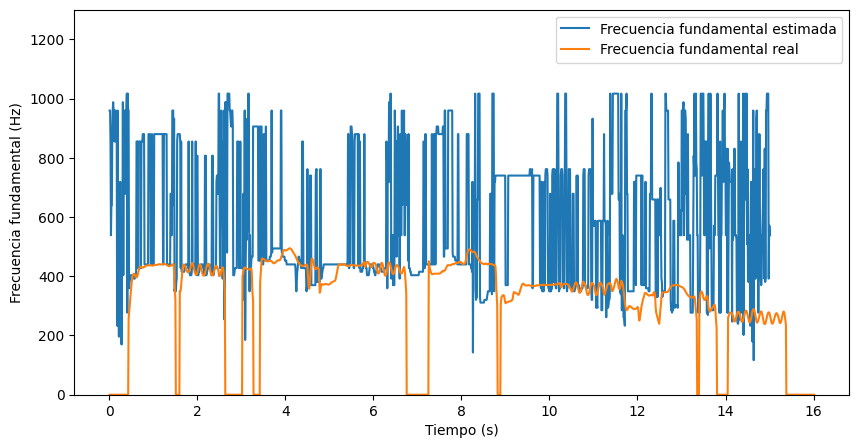

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(
    tiempo_ref[: estimacion.shape[0]],
    estimacion,
    label="Frecuencia fundamental estimada",
)
plt.plot(
    tiempo_ref[: valores_ref.shape[0]], valores_ref, label="Frecuencia fundamental real"
)
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia fundamental (Hz)")
plt.ylim(0, 1300)
plt.legend()
plt.show()


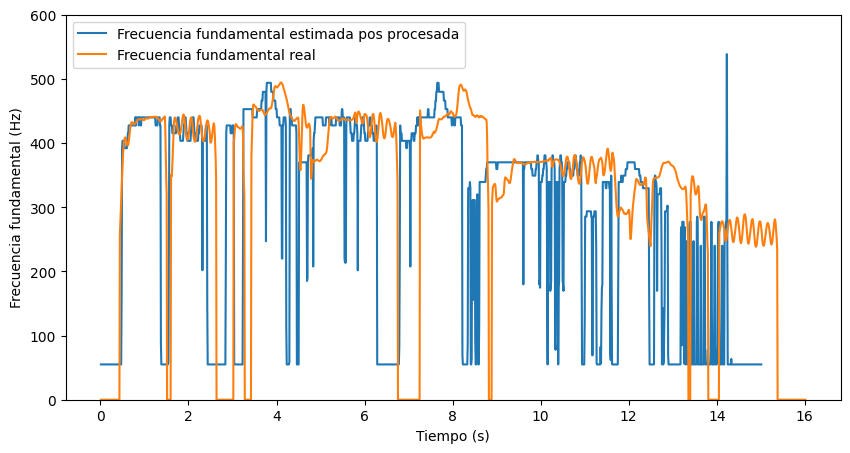

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(
    tiempo_ref[: estimaciones_2.shape[0]],
    estimaciones_2,
    label="Frecuencia fundamental estimada pos procesada",
)
plt.plot(
    tiempo_ref[: valores_ref.shape[0]], valores_ref, label="Frecuencia fundamental real"
)
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia fundamental (Hz)")
plt.ylim(0, 600)
plt.legend()
plt.show()


## Parte 3

1. Utilice el GLogS para obtener una representación tiempo-$f_0$, que denominaremos $f_0$-grama. Compare dicha representación con el espectrograma usando el archivo de audio [_LP-mem-6-a.wav_](./Archivos_P3/LP-mem-6-a.wav).

2. **Responder:** ¿por qué tiene sentido utilizar $f_{max} = 5000~Hz$?

$\qquad$ _Nota:_ Puede ser de utilidad observar el espectrograma completo.

3. Represente la frecuencia fundamental detectada y la frecuencia de referencia en el $f_0$-grama en el archivo [_LP-mem-6-a.txt_](./Archivos_P3/LP-mem-6-a.txt). **Comente si aparecen los errores de armónicos y por qué**.

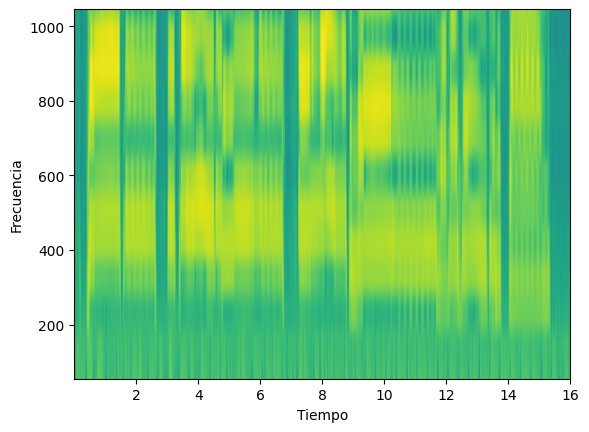

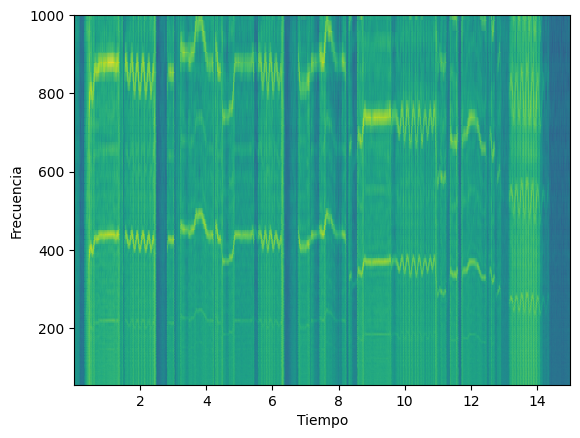

In [10]:
plt.specgram(audio, Fs=sr)
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.ylim(55, 1046)
plt.show()

for i in range(estimacion.shape[0]):
    if estimaciones_2[i] < 55:
        estimaciones_2[i] = 55
    if estimacion[i] > 500:
        estimacion[i] = 55
for i in range(frecuencias_fundamentales_reales.shape[0]):
    if frecuencias_fundamentales_reales[i, 1] < 55:
        frecuencias_fundamentales_reales[i, 1] = 55

plt.pcolormesh(tiempo_ref[:1497], frequencies, GLOGS.T, vmin=0, shading="gouraud")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.ylim(55, 1000)
plt.show()


# Ejercicio 3

En este ejercicio teórico, recordamos la condición la síntesis de la STFT discreta mediante el método Overlap-Add (OLA), de que la suma de las ventanas en el tiempo debe ser igual a una constante, y buscaremos probar que esto se cumple bajo ciertas condiciones para el caso de las ventanas de Hann. 

Las ventanas de Hann, comúnmente usadas en análisis y síntesis mediante OLA, se definen para el caso de una ventana de largo 2M+1 de la manera siguiente:

\begin{equation*}
    w_{Hann}[n]=[0.5 + 0.5cos(\pi n/M)]w_r[n]
\end{equation*}

donde $w_r[n]$ es una ventana rectangular que representa el requerimiento de the $w_{Hann}[n]=0$ cuando $|n|>M$. Esta ventana podría ser de la forma

\begin{equation*}
    w_r[n]=
            \begin{cases}
                1, & -M \leq n \leq M-1 \\
                0, & \text{en otro caso}.
            \end{cases}
\end{equation*}

## Parte 1
Mostrar que la DTFT de $w_r[n]$ es

\begin{equation*}
    W_r(e^{j\omega}) = \bigg(\frac{1-e^{-j\omega 2M}}{1-e^{-j\omega}}\bigg)e^{j\omega M}
\end{equation*}


## Parte 2
**Mostrar que**

\begin{equation*}
    W_{Hann}(e^{j\omega}) = 0.5W_r(e^{j\omega}) +0.25 W_r(e^{j(\omega-\pi/M)})+0.25 W_r(e^{j(\omega+\pi/M)})
\end{equation*}

*Nota:* puede ser de utilidad representar la función $\cos (\pi n /M)$ de $w_{Hann}[n]$ en su formulación de exponenciales complejas.

-------------

Es posible probar, utilizando el resultado de la parte anterior, que $W_{Hann}(e^{j\omega})$ depende solamente de $\omega$ y $M$, **resultando en la siguiente expresión**:

\begin{align*}
W_{Hann}(e^{j\omega}) &= 2j\sin(\omega M) \left[ \frac{1}{2} \left( \frac{1}{1-e^{-j\omega}} \right) - \frac{1}{4} \left( \frac{1}{1-e^{-j(\omega-\pi /M)}}\right) - \frac{1}{4} \left( \frac{1}{1-e^{-j(\omega+\pi /M)}}\right) \right]
\end{align*}

No es necesario demostrar cómo se llega a esta expresión ($\blacklozenge$), pero será de utilidad este resultado para continuar con las siguientes partes.

## Parte 3
Usar los resultados de las partes anteriores para demostrar que $W_{Hann}(e^{j\omega_k}) = 0$ para todo $k=1,2,...,M-1$ (con $\omega_k=\frac{2\pi k}{M}$) y por lo tanto es posible una reconstrucción perfecta si $R=M$ o $R=M/2$ (si $M/2$ es un entero), siendo $R$ el período de muestreo (en muestras) en el tiempo de la STFT. Ver cap 7.5 en [1].

_Sugerencia:_ notar que la reconstrucción perfecta con OLA implica la siguiente igualdad:
$$
y[n] = x[n]\left( \sum_{r=-\infty}^{+\infty} w_{Hann}[rR-n] \right) = x[n],
$$

$\qquad$ donde $x[n]$ es la señal a analizar e $y[n]$ la re-síntesis/reconstrucción.

## Parte 4
Usar los resultados de las partes 1 y 2 para mostrar que $W_{Hann}(e^{j0}) = M$ y por lo tanto la ganancia de reconstrucción es $C=M/R$

# Ejercicio 4

En este ejercicio se implementa la técnica de phase-vocoder y se la utiliza para generar transformaciones de la señal de audio. Se sugiere utilizar el archivo [_singing\_voice.wav_](./Archivos_P3/singing_voice.wav) ó [_guitar\_lick.wav_](./Archivos_P3/guitar_lick.wav) para probarla.

En la etapa de análisis se calcula la transformada de Fourier de tiempo corto, como 

\begin{equation*}
    X_{n_a^u}(e^{j\omega_k})=\sum_{m=-\infty}^{\infty}w_a[n_a^u-m]\, x[m]\, e^{-j\omega_kn}
\end{equation*}

en donde, $w_a[n]$ es la ventana de análisis, $\omega_k=\frac{2\pi}{N} k$, con \(N\) la cantidad de puntos de la DFT, y $n_a^u = u \, R_a$, con $R_a$ el hop de análisis en muestras y $u$ el índice de la trama temporal, de valor inicial 0.

En la etapa de síntesis se reconstruye la señal en el dominio del tiempo mediante la antitransformada de Fourier de cada trama temporal y el procedimiento de solapamiento y suma (overlap-add), como 

\begin{equation*}
    y[n]=\sum_{u=-\infty}^{\infty}w_s[n-n_s^u]y_u[n-n_s^u]
\end{equation*}

con

\begin{equation*}
    y_u[n]=\frac{1}{N}\sum_{k=0}^{N-1}Y_{n_s^u}(e^{j\omega_k}) \, e^{j\omega_kn}
\end{equation*}

en donde, $w_s[n]$ es la ventana de síntesis, y $n_s^u=u \, R_s$, siendo $R_s$ el hop de síntesis en muestras. Notar que $y_u[n]$ es la transformada inversa de Fourier de una trama de la STFT. Cuando no hay modificaciones entre la etapa de análisis y síntesis, $Y_{n_s^u}(e^{j\omega_k}) = X_{n_a^u}(e^{j\omega_k})$ y $R_s = R_a$. En ese caso la ventana de síntesis $w_s[n]$ es opcional, pero se hace importante si se aplican modificaciones, por ejemplo cuando $R_s \neq R_a$.  
  
## Parte 1

Implemente el análisis y la síntesis para $Y_{n_s^u}(e^{j\omega_k})=X_{n_a^u}(e^{j\omega_k})$ y $R_s=R_a$. Elija un valor de $R_a$ para tener reconstrucción perfecta con ventana de Hann y verifique experimentalmente. Justifique su elección.

In [26]:
# fs, x = io.wavfile.read(dir_files+'singing_voice.wav')
fs, x = io.wavfile.read(dir_files+'guitar_lick.wav')
Audio(x, rate=fs)

In [27]:
# sacado de la clase
def synthesis_STFT(X_stft, L=2048, R=256, win="hann"):
    """compute the synthesis using the IFFT of each frame combined with overlap-add

    Parameters
    ----------
    X_stft : numpy array
             STFT of x as a numpy 2D array.
    L : int
        window length in samples.
    R : int
        hop size in samples.
    win : string
          window type as defined in scipy.signal.windows.

    Returns
    -------
    x : numpy array
        output audio signal (mono) as a numpy 1D array.

    """

    # number of frequency bins
    N = X_stft.shape[0]

    # analysis window
    window = signal.windows.get_window(win, L)

    # total number of analysis frames
    num_frames = X_stft.shape[1]

    # initialize otuput signal in the time domain
    y = np.zeros(num_frames * R + L)

    # process each frame
    for ind in range(num_frames):

        # reconstructed signal frame
        yr = np.fft.ifft(X_stft[:, ind], N).real * window

        # initial and ending points of the frame
        n_ini = int(ind * R)
        n_end = n_ini + L

        # overlap-add the signal frame
        y[n_ini:n_end] += yr

    # compute the amplitude scaling factor
    C = np.sum(window * window) / R

    # compensate the amplitude scaling factor
    y /= C

    return y

C =  2.0
max(olawin) =  2.0000000000000004


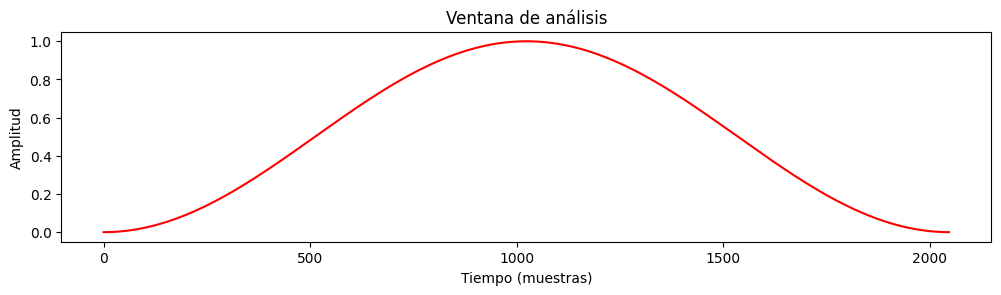

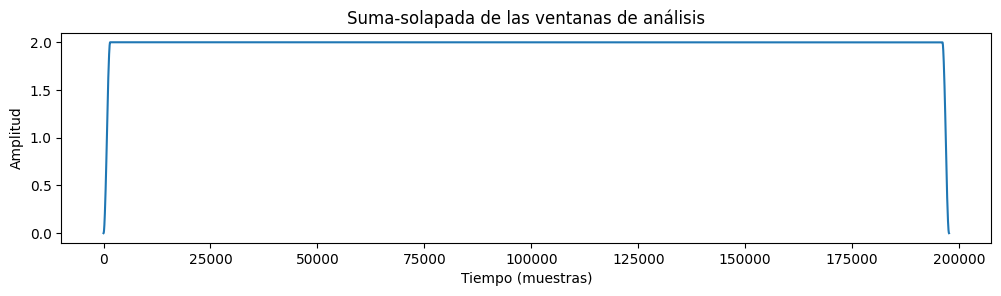

In [40]:
# Verificación experimental
# longitud de la señal de entrada
M = x.size

# longitud de la ventana de análisis en muestras
L = 2048

# tamaño del salto en muestras
R = int(L / 4)

# número total de tramas de análisis
num_frames = int(np.floor((M - L) / R))

# ventana de análisis
window = signal.windows.get_window("hann", L)

# suma-solapada (OLA) de las ventanas de análisis
olawin = np.zeros((num_frames - 1) * R + L)

# para cada trama de análisis
for ind in range(num_frames):

    # índice inicial de la ventana actual
    n_ini = ind * R

    # suma-solapada de la ventana
    olawin[n_ini : n_ini + L] += window

# calcula el factor de escala de amplitud
C = np.sum(window) / R 


print("C = ", C)
print("max(olawin) = ", max(olawin))

# grafica la ventana de análisis
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 1, 1)
plt.plot(window, "r")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (muestras)")
plt.title("Ventana de análisis")
plt.show()

# grafica la suma-solapada de las ventanas de análisis
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 1, 1)
plt.plot(olawin)
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Amplitud")
plt.title("Suma-solapada de las ventanas de análisis")
plt.show()

198450 198144


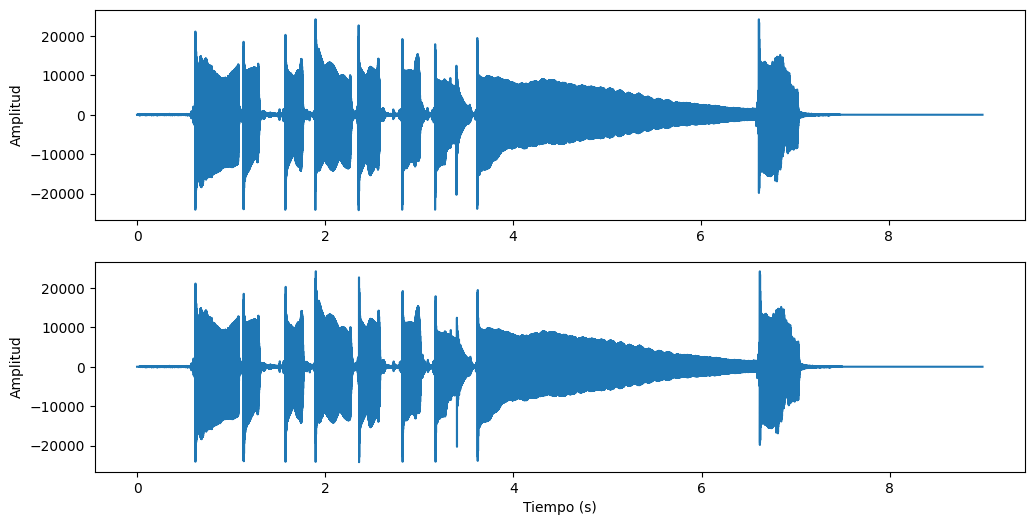

In [66]:
# Análisis y síntesis
# longitud de la ventana en muestras
L = 2048
# tamaño del salto en muestras
R = int(L /4)

# calcula la STFT
X_stft, omega_stft, samps_stft, _ = analysis_STFT(x, L, R, win="hann")


y = synthesis_STFT(X_stft, L, R, win="hann")
# tiempo correspondiente a la señal de audio
time_y = np.arange(0, y.size) / fs
time_x = np.arange(0, x.size) / fs
print(x.size, y.size)
# grafica la forma de onda de la señal de audio
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 1, 1)
plt.plot(time_x, x)
plt.ylabel("Amplitud")
ax1 = plt.subplot(2, 1, 2)
plt.plot(time_y, y)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

## Parte 2

Realice modificaciones de la escala temporal usando $R_s \neq R_a$. En particular pruebe duplicando y reduciendo a la mitad la duración original. Analice los resultados obtenidos y los artefactos que se introducen.

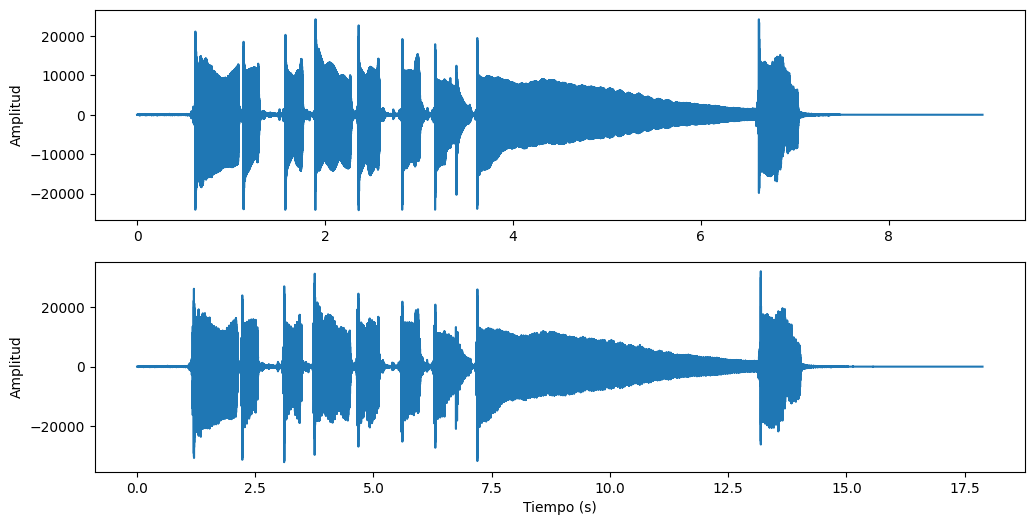

In [76]:
L = 2048
R = int(L / 4)

# compute STFT
X_stft, omega_stft, samps_stft, _ = analysis_STFT(x, L, R, win="hann")

# hop size in samples
R = int(L / 2)

# compute the synthesis from the STFT
y = synthesis_STFT(X_stft, L, R, win="hann")

# time corresponding to the audio signal
time_y = np.arange(0, y.size) / fs

# plot the audio signal waveform
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 1, 1)
plt.plot(time_x, x)
plt.ylabel("Amplitud")
ax1 = plt.subplot(2, 1, 2)
plt.plot(time_y, y)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
display(Audio(x, rate=fs))
display(Audio(y, rate=fs))


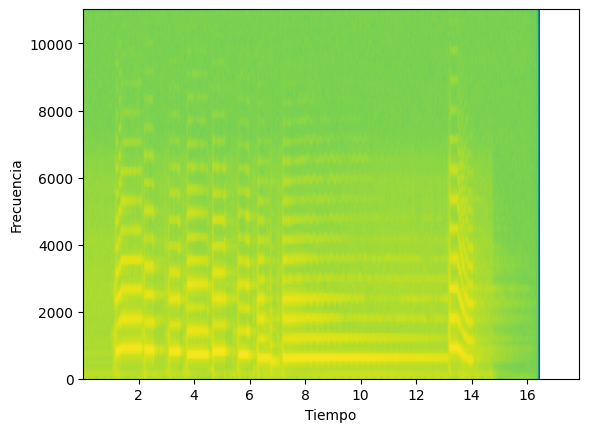

In [77]:
plt.specgram(y, Fs=fs)
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

## Parte 3

Para evitar la mayoría de los problemas introducidos debido a la inconsistencia de fase, se sugiere utilizar el procedimiento de desdoblamiento de fase (phase unwrapping). 

Asumiendo que existe un solo componente sinusoidal por bin de la DFT, podemos plantear las siguientes ecuaciones para estimar la fase de $Y_{n_s^u}(e^{j\omega_k})$, cuando transformamos la escala temporal utilizando un hop de síntesis $R_s \neq R_a$. 

Se calcula el incremento de fase heterodino, a partir del incremento de fase de tramas sucesivas 

\begin{equation*}
    \Delta\Phi_k^u=\angle X_{n_a^u}(e^{j\omega_k}) - \angle X_{n_a^{u-1}}(e^{j\omega_k}) - R_a \, \omega_k
\end{equation*}

Notar que el término $R_a\ \omega_k$ es el incremento de fase que cabría esperar si la frecuencia del componente sinusoidal correspondiera exactamente a la frecuencia de análisis. 

Se toma el argumento principal de $\Delta\Phi_k^u$ entre ($-\pi, \pi$), que denominamos $\Delta_p\Phi_k^u$. 

Luego se calcula la estimación de la frecuencia instantánea

\begin{equation*}
    \hat{\omega}_k[{n^u_a}] = \omega_k + \frac{1}{R_a} \, \Delta_p\Phi_k^u
\end{equation*}

Finalmente se calcula la fase de $Y_{n_s^u}(e^{j\omega_k})$ utilizando la fórmula de propagación de fase

\begin{equation*}
    \angle Y_{n_s^u}(e^{j\omega_k}) = \angle Y_{n_s^{u-1}}(e^{j\omega_k}) + R_s \, \hat{\omega}_k[{n^u_a}]
\end{equation*}

Notar que de acuerdo a la fórmula anterior se hace necesario acumular la fase de tramas sucesivas y establecer un valor para la fase inicial (se sugiere considerar $\angle Y_{n_s^{0}}(e^{j\omega_k}) = \angle X_{n_a^{0}}(e^{j\omega_k})$). Cabe señalar que es importante aplicar una ventana de suavizado $w_s[n]$ en la síntesis. Se sugiere utilizar ventanas de Hann con $w_a[n] = w_s[n]$. Tenga en cuenta que esto modifica el factor de escalamiento temporal. Para profundizar en el estudio de este procedimiento y otras consideraciones sobre la fase se recomienda [2,3].


Implemente el desdoblamiento de fase y compare los resultados con los obtenidos en la parte anterior. 

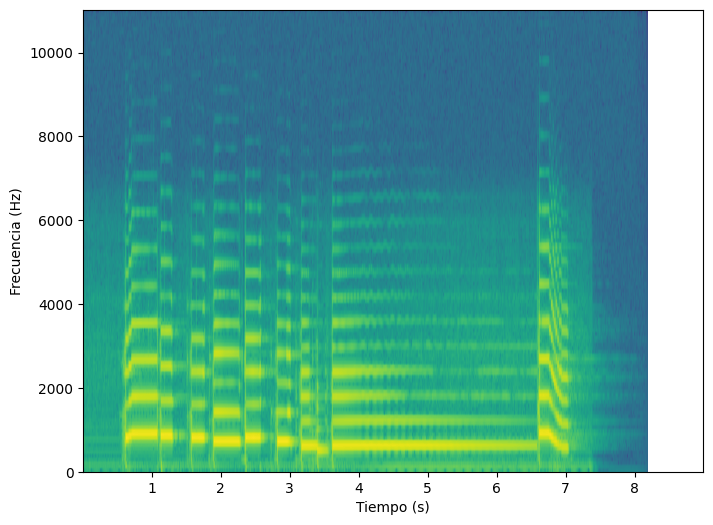

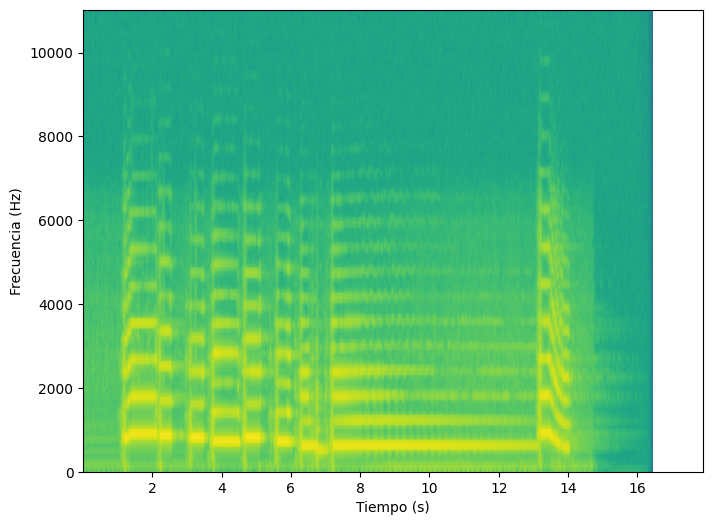

In [78]:
def princ_arg(angulo):
    """Calcula el argumento principal en el rango (-pi, pi)"""
    return np.angle(np.exp(1j * angulo))

# Parámetros
L = 2048  # longitud de la ventana en muestras
Ra = 256  # tamaño del salto de análisis
Rs = 512  # tamaño del salto de síntesis
M = x.size
num_tramas = int(np.floor((M - L) / Ra))

# Calcular STFT
X_stft, omega_stft, _, _ = analysis_STFT(x, L, Ra, win="hann")
num_bins = X_stft.shape[0]

# Inicializar arreglos
delta_phi = np.zeros((num_bins, num_tramas))  # argumento principal del incremento de fase heterodino
fase_inst = np.zeros((num_bins, num_tramas))  # frecuencia instantánea
PF = np.zeros((num_bins, num_tramas))         # fase final

# Pre-calcular valores
omega = omega_stft * Ra  # centros de los bins de frecuencia
magnitud = np.abs(X_stft)
fase = np.angle(X_stft)

# Inicializar primera trama
PF[:, 0] = fase[:, 0]

# Procesar tramas restantes
for trama in range(1, num_tramas):
    trama_anterior = trama - 1
    
    # Calcular incremento de fase heterodino
    delta_phi[:, trama] = princ_arg(fase[:, trama] - fase[:, trama_anterior] - omega)
    
    # Calcular frecuencia instantánea
    fase_inst[:, trama] = (omega + delta_phi[:, trama]) / Ra
    
    # Propagar fase
    PF[:, trama] = PF[:, trama_anterior] + Rs * fase_inst[:, trama]

# Reconstruir STFT con fase corregida
Z = magnitud * np.exp(1j * PF)

# Sintetizar señal de salida
y = synthesis_STFT(Z, L, Rs, win="hann")

# Mostrar resultados
display(Audio(y, rate=fs))

# Graficar espectrogramas
plt.figure(figsize=(8, 6))
plt.specgram(x, Fs=fs)
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(y, Fs=fs)
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.show()

## Parte 4

Usando el phase-vocoder implemente las siguientes transformaciones de la señal de audio. Además de implementar **1)**, hacer _por lo menos_ una de las opciones **2)** y **3)**.

**_Nota:_** incluya en el informe los espectrogramas de las señales generadas y entregue también las señales de audio.

 1. **Transposición en frecuencia (pitch-shifting)**: Se desea una señal de la misma duración que la señal original, pero alterando su contenido espectral. Para ello deben realizarse dos acciones complementarias: un escalamiento en el tiempo y un cambio en la frecuencia de muestreo. Por ejemplo, si se desea subir/bajar el contenido espectral de la señal un semitono, se debe aumentar/disminuir la duración de la señal por un factor de $2^{\frac{1}{12}}$, y luego aumentar/disminuir la frecuencia de muestreo por el mismo factor, de modo de obtener una señal de la misma duración que la original.
 
_Elegir:_

 2. **Armonizador**: Utilizando el efecto de transposición en frecuencia sumar a la señal original una versión desplazada una quinta (factor de $2^{\frac{7}{12}}\simeq\frac{3}{2}$).
 
 $\qquad$ y/ó

 3. **Coro (_chorus_)**: Consiste en simular que la señal de voz de un único interprete es entonada por varias voces cantando al unísono (es una variación del efecto de armonización). Se deben superponer varias señales con pequeñas modificaciones de _pitch_ respecto al de la señal original y ligeramente distinto para cada uno. El cambio no debe ser mayor que un cuarto de semitono (factor de $2^{\frac{1}{48}}$).

In [93]:
L = 2048
Ra = 256
Rs = 256 * int(2 ** (1 / 48))


def phase_vocoder(L, Ra, Rs, x):
    """
    Implementa un phase vocoder para modificar el pitch de una señal de audio.
    
    Parámetros:
    L: Longitud de la ventana en muestras
    Ra: Hop size para análisis
    Rs: Hop size para síntesis 
    x: Señal de entrada
    
    Retorna:
    y: Señal procesada
    """
    # Calcular número de tramas
    M = x.size
    num_frames = int(np.floor((M - L) / Ra))
    
    # Calcular STFT
    X_stft, omega_stft, _, _ = analysis_STFT(x, L, Ra, win="hann")
    
    # Inicializar arrays
    num_bins = X_stft.shape[0]
    delta_phi = np.zeros((num_bins, num_frames))
    PF = np.zeros((num_bins, num_frames))
    phase_inc = np.zeros((num_bins, num_frames))
    
    # Calcular frecuencia base para cada bin
    omega = omega_stft * Ra
    
    # Extraer magnitud y fase de la STFT
    magnitud = np.abs(X_stft)
    fase = np.angle(X_stft)
    
    # Inicializar primera trama de fase
    PF[:, 0] = fase[:, 0]
    
    # Procesar tramas
    for trama in range(1, num_frames):
        trama_anterior = trama - 1
        
        # Calcular diferencia de fase instantánea
        delta_phi[:, trama] = princ_arg(fase[:, trama] - fase[:, trama_anterior] - omega)
        
        # Calcular frecuencia instantánea
        phase_inc[:, trama] = (omega + delta_phi[:, trama]) / Ra
        
        # Propagar fase
        PF[:, trama] = PF[:, trama_anterior] + Rs * phase_inc[:, trama]

    # Reconstruir STFT con fase modificada
    Z = magnitud * np.exp(1j * PF)
    
    # Sintetizar señal de salida
    y = synthesis_STFT(Z, L, Rs, win="hann")
    
    return y

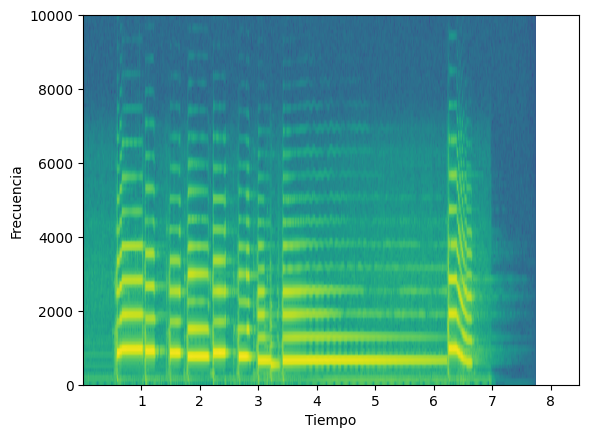

(0.0, 10000.0)

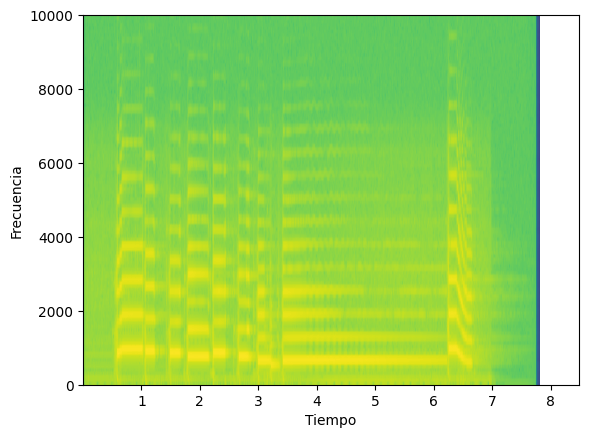

In [97]:
# PITCH SHIFTING
# window length in samples
L = 2048
# hop size in samples
Ra = 256
# Aumentar Rs por un factor de 2^(1/12) para subir un semitono
Rs = 256 * int(2 ** (1 / 12))
# Aplicar phase vocoder para estirar la señal
y1 = phase_vocoder(L, Ra, Rs, x)

# Reproducir con frecuencia de muestreo aumentada por el mismo factor
# para mantener la duración original pero con el pitch aumentado
display(Audio(y1, rate=fs * (2 ** (1 / 12))))

plt.specgram(x, Fs=fs * (2 ** (1 / 12)))
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.ylim(0, 10000)
plt.show()

# Graficar espectrograma ajustando la frecuencia de muestreo
plt.specgram(y1, Fs=fs * (2 ** (1 / 12)))
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.ylim(0, 10000)

/Users/fbello/personal/fing/audio/.venv/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(0.0, 10000.0)

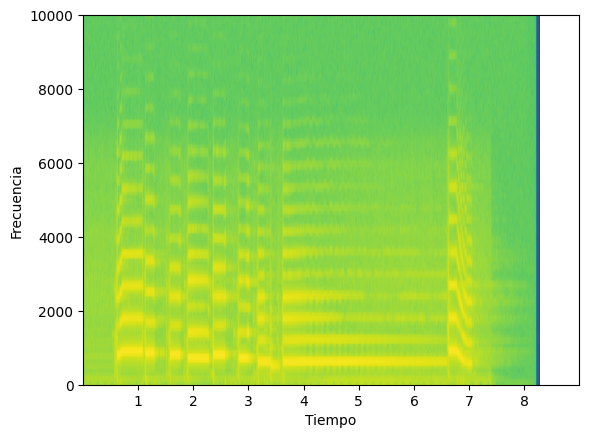

In [85]:
# ARMONIZADOR
# window length in samples
L = 2048
# hop size in samples
Ra = 256
Rs = 256 * int(2 ** (7 / 12))
y2 = phase_vocoder(L, Ra, Rs, x)

# Sumar la señal original con la versión transpuesta una quinta
largo = min(x.size, y2.size)
y_armonizado = x[:largo] + y2[:largo]

display(Audio(y_armonizado, rate=fs))

plt.specgram(y_armonizado, Fs=fs)
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.ylim(0, 10000)

/var/folders/nv/tttv2_dd6pv79_xq9_d9nhzr0000gn/T/ipykernel_62882/1704828473.py:49: RuntimeWarning: divide by zero encountered in scalar divide
  C = np.sum(window * window) / R


(0.0, 10000.0)

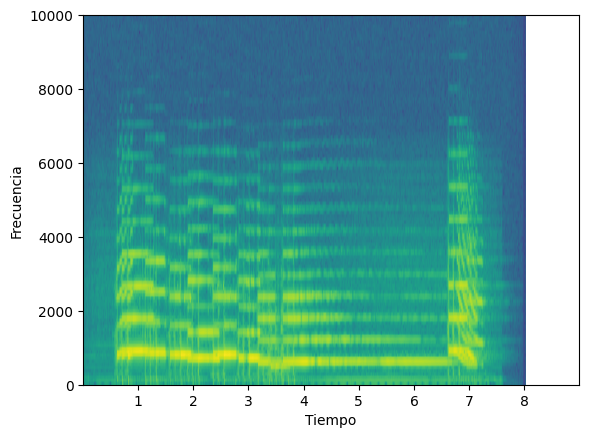

In [98]:
# CHORUS
L = 2048
Ra = 256

# Generar varias voces con pequeñas variaciones de pitch
n_voces = 5  # Aumentamos el número de voces para un efecto más rico
y_chorus = x.astype(np.float64).copy()

# Factores de transposición ligeramente diferentes para cada voz
# No más de 1/4 de semitono (2^(1/48))
# Usamos factores más variados pero dentro del límite
factores = [
    2**(1/48),    # +1/4 semitono
    2**(-1/48),   # -1/4 semitono  
    2**(1/96),    # +1/8 semitono
    2**(-1/96),   # -1/8 semitono
    2**(1/192)    # +1/16 semitono
]

for i in range(n_voces):
    Rs = 256 * int(factores[i])
    yi = phase_vocoder(L, Ra, Rs, x)
    
    # Agregamos un pequeño retardo aleatorio a cada voz para más naturalidad
    delay = np.random.randint(100, 1000)
    yi_delayed = np.pad(yi, (delay, 0))[:yi.size]
    
    largo = min(y_chorus.size, yi_delayed.size)
    y_chorus[:largo] += yi_delayed[:largo].astype(np.float64)

# Normalizar la suma
y_chorus = y_chorus / (n_voces + 1)

# Convertir a int16 para reproducción
y_chorus = y_chorus.astype(np.int16)

display(Audio(y_chorus, rate=fs))

plt.specgram(y_chorus, Fs=fs)
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.ylim(0, 10000)

/Users/fbello/personal/fing/audio/.venv/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


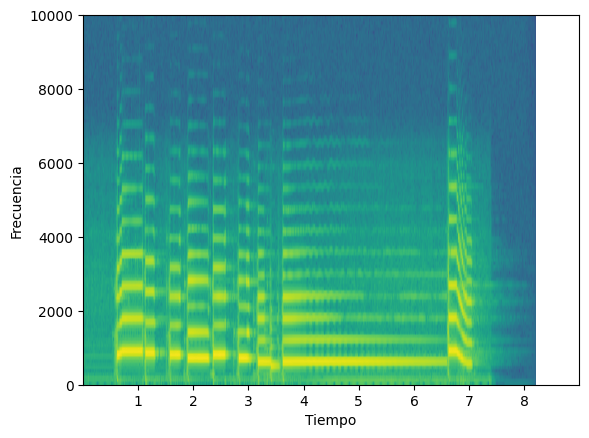

In [92]:
display(Audio(x, rate=fs))
plt.specgram(x, Fs=fs)
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.ylim(0, 10000)
plt.show()


------

# Referencias

[1] L. R. Rabiner and R. W. Schafer, *Theory and Applications of Digital Speech Processing*. Prentice
Hall, 1st ed., 2011.

[2] J. Laroche and M. Dolson, “Improved phase vocoder time-scale modification of audio,” *IEEE Transac-
tions on Speech and Audio processing*, vol. 7, no. 3, pp. 323–332, 1999.

[3] A. Gotzen, N. Bernardin, and D. Arfib., “Traditional implementations of a phase-vocoder: The tricks
of the trade,” in *International Conference on Digital Audio Effects, Italy*, Dec. 2000